# Imports

In [13]:
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings

from src import degree_tools

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Модели сетей

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 2: Модели"
* Документация:
    * https://networkx.github.io/documentation/stable/reference/readwrite/index.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html
* Датасеты с сетями:
    * http://networkrepository.com
    * http://konect.cc/networks/
    * https://snap.stanford.edu/data/
    * https://networkdata.ics.uci.edu/resources.php
    * https://kateto.net/2016/05/network-datasets/

### Распределение степеней узлов

1.1 Загрузить большую (с кол-вом узлов `𝑁`>200 ) сеть из внешнего источника. Визуализировать закон распределения степеней узлов в обычной и логарифимических (по 1й и по 2м осям) системах координат.

In [2]:
G = nx.read_weighted_edgelist('data/rt_assad.edges', delimiter=',')
# nx.draw(G)

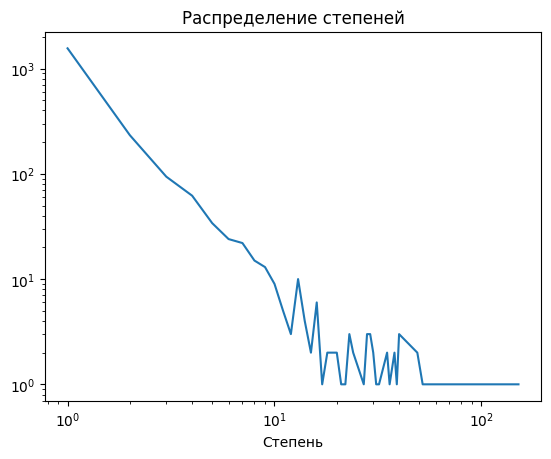

In [3]:
counts = degree_tools.get_count(G)
ax = counts.sort_index().plot()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Распределение степеней')
ax.set_xlabel('Степень');

1.2 Построить график выборочной функции распределения степеней узлов для загруженного графа.

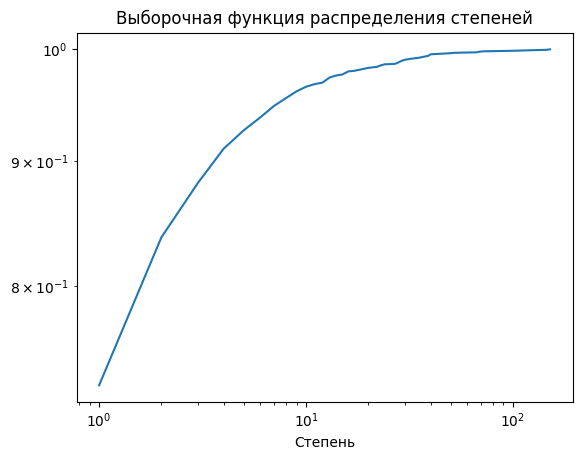

In [4]:
counts = degree_tools.get_empirical_cdf(G)
ax = counts.sort_index().plot()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Выборочная функция распределения степеней')
ax.set_xlabel('Степень');

### Модель предпочтительного присоединения

2.1 Используя реализацию модели предпочтительного присоединения Барабаши-Альберта из `networkx`, построить сеть с кол-вом узлов 𝑁>50.

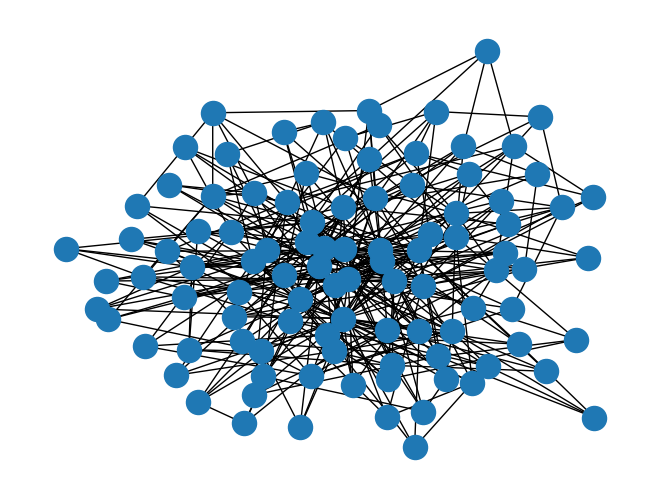

In [4]:
G = nx.barabasi_albert_graph(100, 4)
nx.draw(G)

2.2 Создать визуализацию графа, построенного в задаче 2.1, в которой размер и цвет узла определяется его степенью.

2.3 Используя решение задачи 2.1, построить сеть с кол-вом узлов `N=10000`. Визуализировать закон распределения степеней узлов сети в обычной и логарифимических (по 1й и по 2м осям) системах координат. Построить график выборочной функции распределения степеней узлов для сети из задания 2.1.

2.4. Визуализировать закон распределения степеней узлов с использованием log-binning для сети из 2.3. Для сравнения на этом же графике изобразите график закона распределения без использования log-binning в log-log координатах.

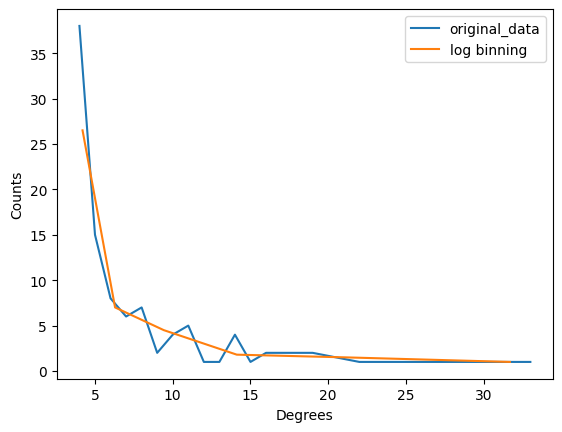

In [15]:
num_bins = 10

degree_counts = degree_tools.get_count(G)
max_degree = max(degree_counts)
bins = np.logspace(0, np.log10(max_degree), num_bins)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    hist_sums, _ = np.histogram(degree_counts.index, bins=bins, weights=degree_counts)
    hist_counts, _ = np.histogram(degree_counts.index, bins=bins)
    hist_means = hist_sums / hist_counts
    
bin_means = (bins[:-1] + bins[1:]) / 2

ax = degree_counts.plot(label='original_data')
ax.plot(bin_means, hist_means, label='log binning')
ax.legend()
ax.set_xlabel('Degrees')
ax.set_ylabel('Counts')
plt.show()

2.5 Реализовать алгоритм предпочтительного присоединения с целочисленными параметрами  `n0`, `m` ,`𝑡`:

* `n0`  - количество узлов в исходной сети (считаем, что исходная сеть является полным графом);
* `m`  - количество связей у каждого вновь добавляемого узла;
* `𝑡`   - количество итераций по добоавлению нового узла. 

Проверить корректность алгоритма с помощью анализа распределения степеней узлов сгенерированной сети.

# Часть для получения баллов вне семинаров

## Задания 3.1 - 4.2 (2 балла)

### Модель тесного мира Уотса-Строгатса

3.1 C помощью реализации модели Уотса-Строгатса из `networkx` сгенерировать небольшие сети с разным `p` и визуализировать их. При визуализации зафиксировать положение узлов всех графов.

3.2 C помощью реализации модели Уотса-Строгатса из networkx сети с кол-вом узлов порядка 1000 и с разным p. Визуализировать результаты пересвязывания, построить на одном графике относительные изменения среднего коэффициента кластеризации и средней длины пути относительно варианта сети без пересвязывания.

### Случайные сети

4.1 C помощью `nx.configuration_model` построить рандомизированный аналог одной из небольших реальных сетей, загруженной из датасетов. Визуализируйте исходный и рандомизированный граф рядом.

4.2 Проверьте, совпадают ли распределения степеней узлов исходного и рандомизированного графа.

## Задание 5.1 (2 балла)

Если степени сети распределены по степенному закону, то закон и плотность распределения имеют вид:

$$ F(x) = 1 + \frac{Cx^{-\alpha+1}}{-alpha + 1},$$

$$ p(x) = Cx^{-\alpha},$$

$$C = \frac{\alpha - 1}{x_{\text{min}}^{-\alpha + 1}}$$ 

5.1 Реализуйте метод максимального правдоподобия и при его помощи оцените параметры степенного закона для одной из сетей, загруженной из датасетов. Визуализируйте оцененную плотность распреления и распределение степеней сети (распределение степеней сети визуализируйте, построив гистограмму с density=True).

Метод максимального правдоподобия реализуйте в виде функции, которая принимает последовательность из всех степеней в графе, и возвращает лучшее $\alpha$ и  $x_{min}$

Шаги метода максимального правдоподобия:
1. $x_{min}$ - наименьшая степень узла
2. Расчитайте $\alpha$ используя оценку максимального правдоподобия
$$\alpha = 1 + n \left[\sum_i \log \frac{x_i}{x_{min}} \right]^{-1}$$
3. Расчитайте расстояние Колмогорова-Смирнова
4. Выберите в качестве $x_{min}$ следующую по величине степень (все степени меньше игнорируйте в будущих вычислениях)
5. Повторите шаги 2-4 проверяя все возможные $x_{min}$ и найдите лучшие $\alpha$ и $x_{min}$ (чем меньше расстояние Колмогорова-Смирнова, тем лучше)

_Hints:_
* _Для расчета расстояния Колмогорова-Смирнова используйте `scipy.stats.kstest` с параметром `cdf=power_law_cdf`, где `power_law_cdf` - функция распределения степенного закона_